In [1]:
# library for preprocessing
import numpy as np
import cv2 as cv
import os
import random
import matplotlib.pyplot as plt

# library for model implementation
from tensorflow import keras
from tensorflow.keras import models

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
DIRECTORY = 'Dataset'
CATEGORIES = ['Bacterialleafblight', 'Brownspot', 'HEALTHY', 'Leafsmut']

In [3]:
SIZE = 224

DATA = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr, (SIZE, SIZE))
        DATA.append([img_arr, label])

In [4]:
len(DATA)

510

In [5]:
random.shuffle(DATA)

In [6]:
DATA[0]

[array([[[214, 214, 230],
         [216, 217, 230],
         [216, 222, 235],
         ...,
         [216, 222, 235],
         [216, 220, 238],
         [216, 223, 238]],
 
        [[214, 214, 230],
         [213, 217, 228],
         [214, 220, 233],
         ...,
         [216, 221, 234],
         [211, 218, 235],
         [216, 223, 238]],
 
        [[214, 214, 230],
         [213, 216, 229],
         [214, 217, 231],
         ...,
         [219, 223, 238],
         [213, 218, 235],
         [214, 221, 236]],
 
        ...,
 
        [[213, 216, 231],
         [217, 220, 235],
         [213, 219, 232],
         ...,
         [215, 220, 235],
         [217, 222, 237],
         [218, 224, 237]],
 
        [[212, 217, 232],
         [215, 218, 232],
         [213, 218, 233],
         ...,
         [216, 220, 234],
         [217, 222, 237],
         [216, 222, 235]],
 
        [[214, 219, 234],
         [215, 219, 230],
         [212, 219, 236],
         ...,
         [215, 220, 235],
  

In [7]:
X = []
Y = []

for FEATURES, TARGET in DATA:
    X.append(FEATURES)
    Y.append(TARGET)

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
X.shape

(510, 224, 224, 3)

In [10]:
X.shape

(510, 224, 224, 3)

In [11]:
Y.shape

(510,)

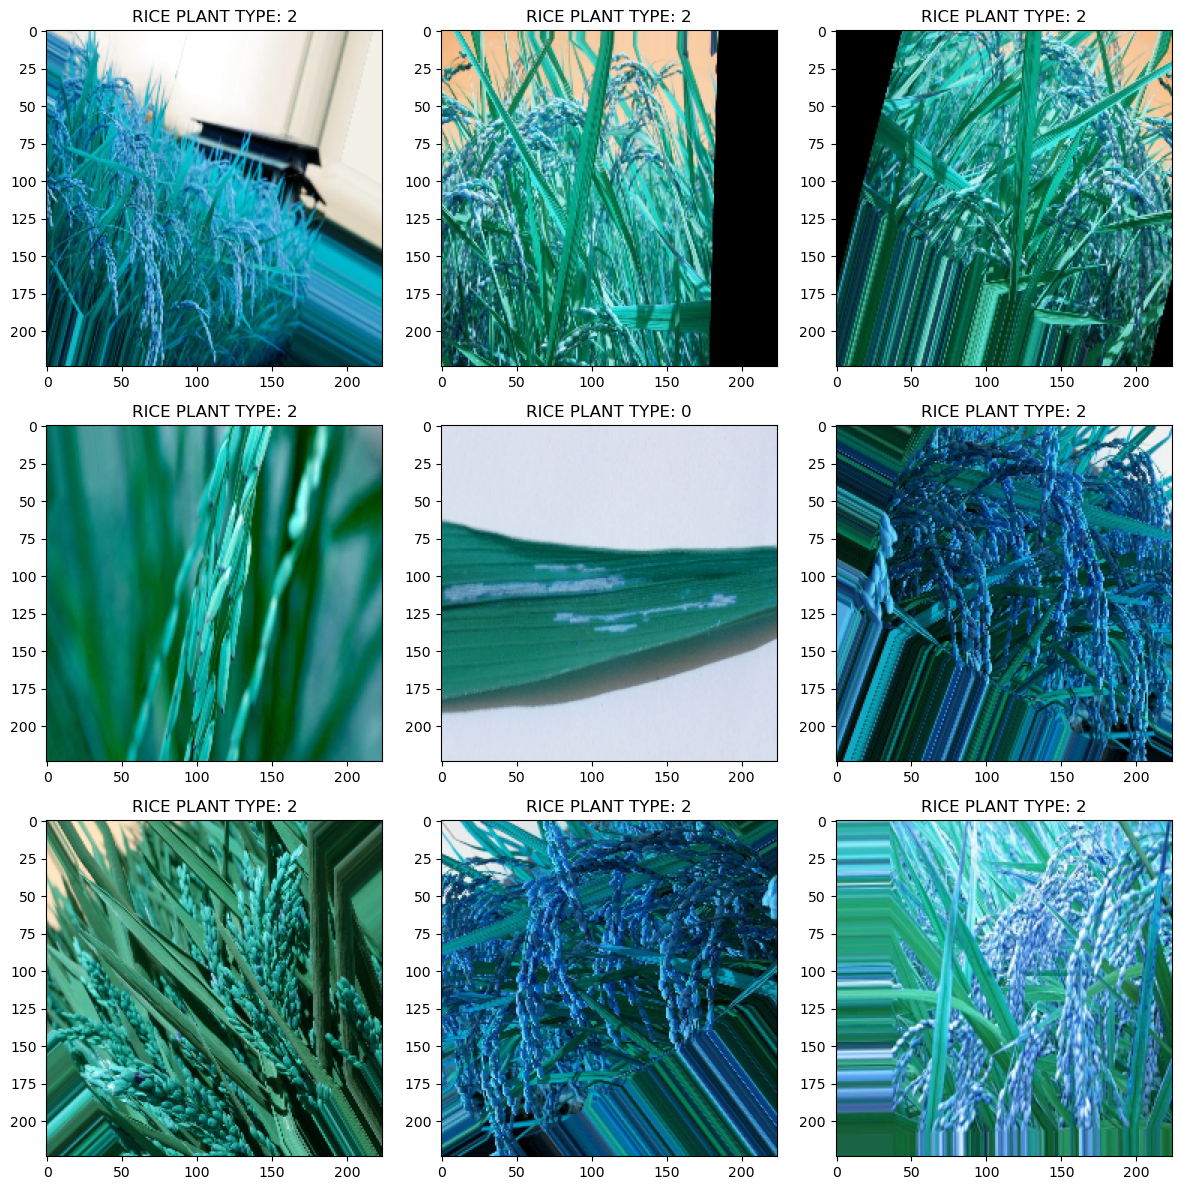

In [12]:
# Here Type Represent {0 : 'Bacterialleafblight', 1 : 'Brownspot', 2  : 'HEALTHY', 3 : 'LEAFsmut'}

fig,ax=plt.subplots(3, 3)
fig.set_size_inches(12,12)
for i in range(3):
    for j in range (3):
        l=random.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('RICE PLANT TYPE: '+ str(Y[l]))
        
plt.tight_layout()

#### SPLITING THE DATA FOR TRAINING AND TESTING

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [15]:
X_train.shape

(382, 224, 224, 3)

In [16]:
X_test.shape

(128, 224, 224, 3)

In [17]:
y_train.shape

(382,)

In [18]:
y_test.shape

(128,)

In [19]:
X_train[0]

array([[[238, 230, 221],
        [238, 230, 221],
        [238, 230, 221],
        ...,
        [242, 239, 231],
        [242, 239, 231],
        [241, 239, 231]],

       [[237, 234, 224],
        [237, 234, 224],
        [236, 234, 223],
        ...,
        [241, 238, 229],
        [241, 238, 229],
        [240, 238, 229]],

       [[225, 223, 215],
        [225, 223, 215],
        [227, 225, 217],
        ...,
        [240, 238, 228],
        [240, 238, 228],
        [240, 238, 228]],

       ...,

       [[ 58, 147, 190],
        [ 23, 109, 146],
        [  1,  65,  71],
        ...,
        [  9,  36,  33],
        [  9,  36,  33],
        [  9,  36,  33]],

       [[ 58, 147, 190],
        [ 21, 107, 145],
        [  1,  65,  71],
        ...,
        [  9,  36,  33],
        [  9,  36,  33],
        [  9,  36,  33]],

       [[ 58, 147, 190],
        [ 19, 105, 142],
        [  1,  65,  71],
        ...,
        [  9,  36,  33],
        [  9,  36,  33],
        [  9,  36,  33]]

In [20]:
y_train[:20]

array([2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2])

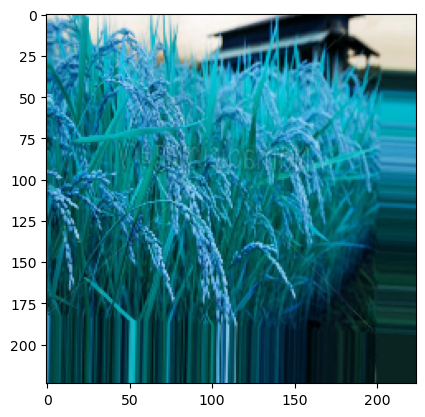

In [21]:
plt.imshow(X_train[0])
plt.show()

In [22]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([2, 3, 2, 2, 2])

In [23]:
classes = ['Bacterialleafblight', 'Brownspot', 'HEALTHY', 'Leafsmut']

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

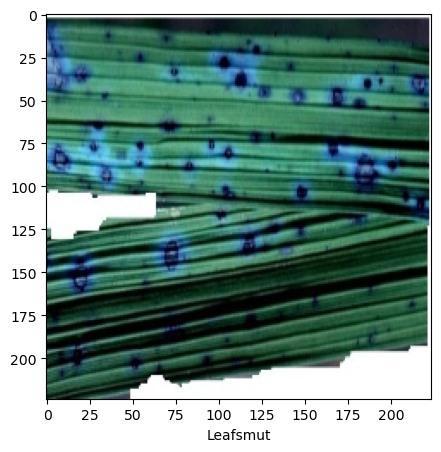

In [25]:
plot_sample(X_train, y_train, 1)

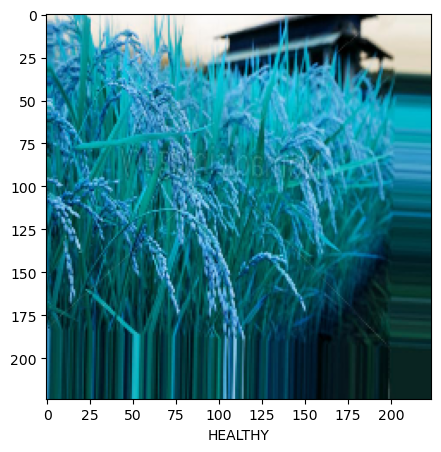

In [26]:
plot_sample(X_train, y_train, 0)

In [27]:
### Data Normalization

X_train = X_train/255
X_test = X_test/255

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### ANN Model Implementation

In [28]:
ann = models.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    
    keras.layers.Dense(4, activation='softmax')
])

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 38,578,788
Trainable params: 38,578,788
No

In [29]:
ann.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [30]:
model1 = ann.fit(datagen.flow(X_train, y_train), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
12/12 [==============================] - 16s 1s/step - loss: 23.0384 - accuracy: 0.5838 - val_loss: 2.4376 - val_accuracy: 0.7344
Epoch 2/20
12/12 [==============================] - 14s 1s/step - loss: 8.4028 - accuracy: 0.6361 - val_loss: 2.7933 - val_accuracy: 0.8359
Epoch 3/20
12/12 [==============================] - 12s 997ms/step - loss: 6.3699 - accuracy: 0.7068 - val_loss: 3.8508 - val_accuracy: 0.8047
Epoch 4/20
12/12 [==============================] - 12s 972ms/step - loss: 5.6509 - accuracy: 0.7120 - val_loss: 4.0056 - val_accuracy: 0.8203
Epoch 5/20
12/12 [==============================] - 13s 1s/step - loss: 4.3318 - accuracy: 0.7644 - val_loss: 4.2509 - val_accuracy: 0.8125
Epoch 6/20
12/12 [==============================] - 13s 1s/step - loss: 4.1566 - accuracy: 0.7827 - val_loss: 3.8825 - val_accuracy: 0.8203
Epoch 7/20
12/12 [==============================] - 11s 953ms/step - loss: 4.0175 - accuracy: 0.7565 - val_loss: 2.8185 - val_accuracy: 0.8438
Epoch 8/20

In [31]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 56ms/step - loss: 0.9912 - accuracy: 0.8359


[0.9911789894104004, 0.8359375]

4/4 [==============================] - 0s 53ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.00      0.00      0.00         9
           2       0.94      0.96      0.95       102
           3       0.37      0.64      0.47        11

    accuracy                           0.84       128
   macro avg       0.43      0.48      0.45       128
weighted avg       0.80      0.84      0.82       128



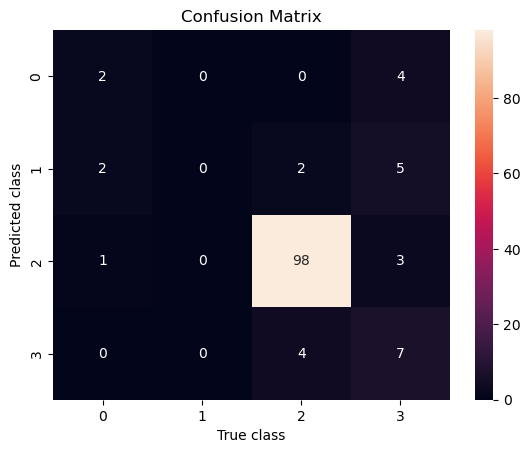

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
pred1 = ann.predict(X_test)
pred1_class = [np.argmax(element) for element in pred1]

print('Classification Report : \n', classification_report(y_test, pred1_class))

conmax = confusion_matrix(y_test, pred1_class)

sns.heatmap(conmax,annot=True)
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

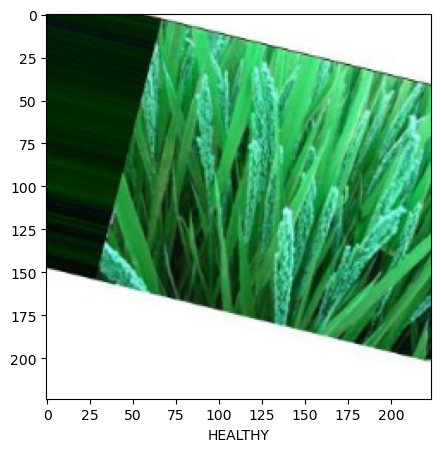

In [33]:
plot_sample(X_test, y_test, 1)

In [34]:
classes[pred1_class[1]]

'Leafsmut'

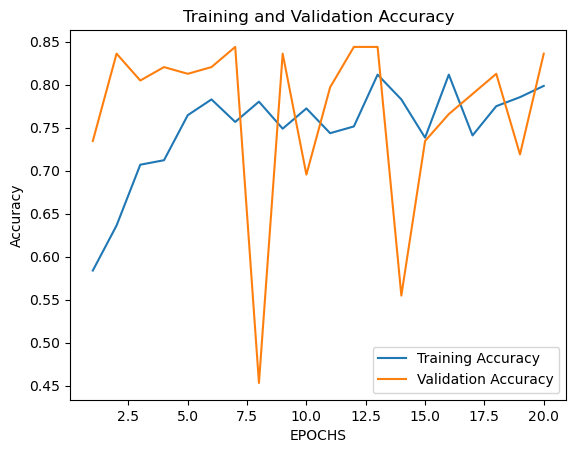

In [35]:
# plotting the graph for accuracy and vel_accuracy
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

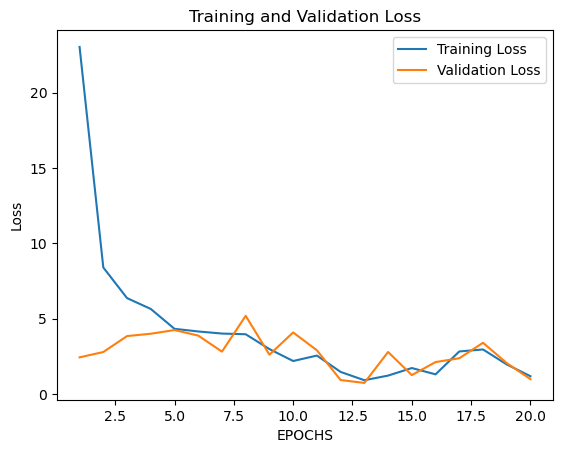

In [36]:
# plotting the graph for accuracy and vel_accuracy
loss = model1.history['loss']
val_loss = model1.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 55ms/step


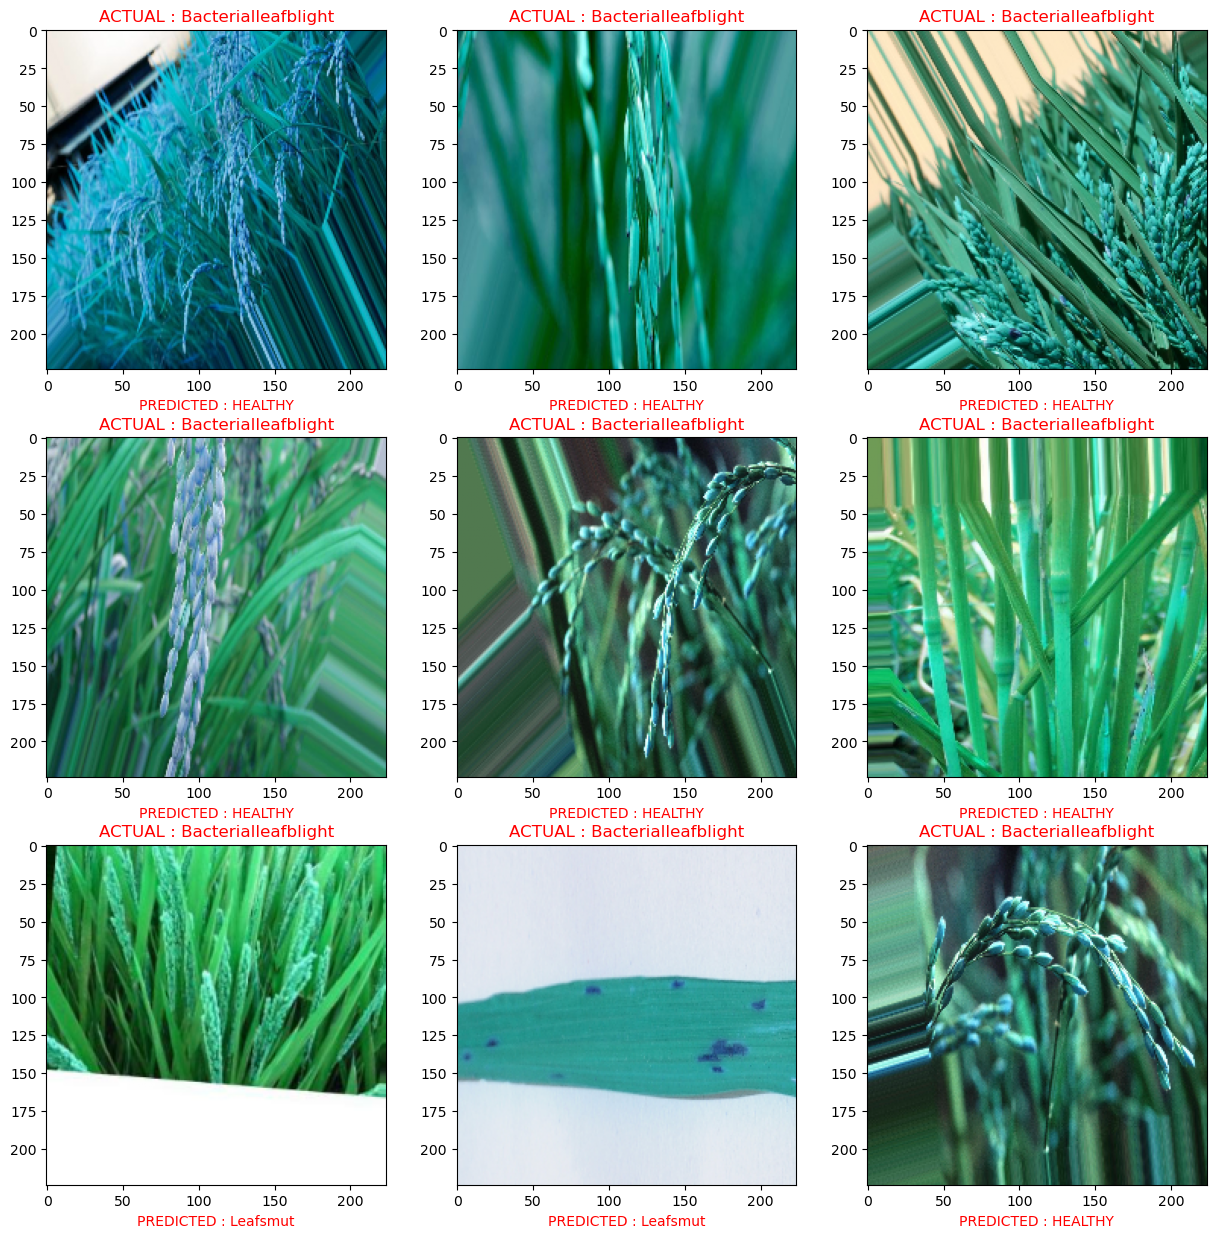

In [37]:
# categories = np.sort(os.listdir(DIRECTORY))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        if(classes[np.argmax(y_test[k])] == classes[np.argmax(ann.predict(X_test)[k])]):
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(ann.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(ann.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

### CNN Model Implementation

In [83]:
cnn = models.Sequential([
    # cnn
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(4, activation='softmax')
])

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 32)      

In [84]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [85]:
model2 = cnn.fit(datagen.flow(X_train, y_train), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
12/12 [==============================] - 43s 4s/step - loss: 1.1493 - accuracy: 0.6492 - val_loss: 0.7957 - val_accuracy: 0.7969
Epoch 2/20
12/12 [==============================] - 41s 3s/step - loss: 0.8598 - accuracy: 0.7539 - val_loss: 0.6563 - val_accuracy: 0.7969
Epoch 3/20
12/12 [==============================] - 41s 3s/step - loss: 0.6979 - accuracy: 0.7539 - val_loss: 0.5034 - val_accuracy: 0.7969
Epoch 4/20
12/12 [==============================] - 40s 3s/step - loss: 0.6011 - accuracy: 0.7539 - val_loss: 0.4301 - val_accuracy: 0.7969
Epoch 5/20
12/12 [==============================] - 41s 3s/step - loss: 0.4919 - accuracy: 0.7670 - val_loss: 0.3228 - val_accuracy: 0.8984
Epoch 6/20
12/12 [==============================] - 41s 3s/step - loss: 0.4332 - accuracy: 0.8168 - val_loss: 0.2904 - val_accuracy: 0.8906
Epoch 7/20
12/12 [==============================] - 41s 3s/step - loss: 0.4241 - accuracy: 0.8272 - val_loss: 0.3016 - val_accuracy: 0.8438
Epoch 8/20
12/12 [==

In [86]:
cnn.evaluate(X_test, y_test)

4/4 [==============================] - 3s 630ms/step - loss: 0.2319 - accuracy: 0.8984


[0.23187255859375, 0.8984375]

4/4 [==============================] - 3s 629ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.43      1.00      0.60         6
           1       0.50      0.22      0.31         9
           2       0.98      1.00      0.99       102
           3       0.83      0.45      0.59        11

    accuracy                           0.90       128
   macro avg       0.69      0.67      0.62       128
weighted avg       0.91      0.90      0.89       128



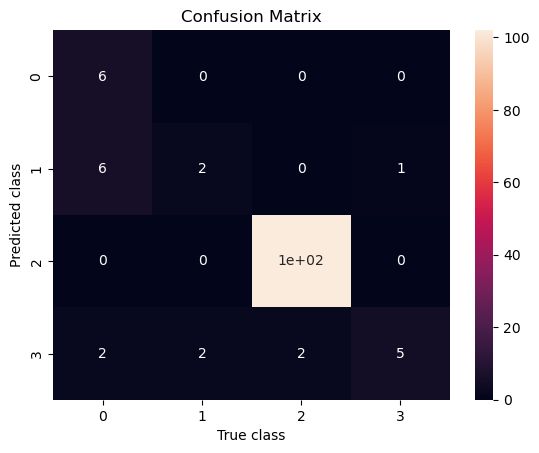

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
pred2 = cnn.predict(X_test)
pred2_class = [np.argmax(element) for element in pred2]

print('Classification Report : \n', classification_report(y_test, pred2_class))

conmax = confusion_matrix(y_test, pred2_class)

sns.heatmap(conmax,annot=True)
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

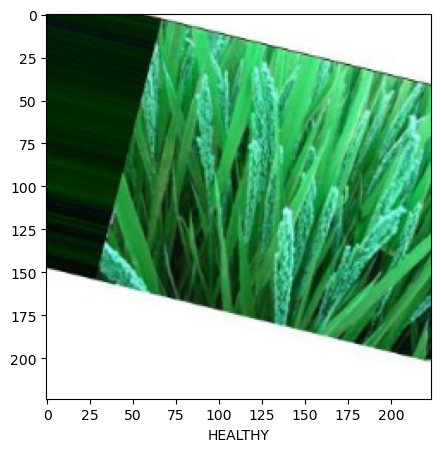

In [88]:
plot_sample(X_test, y_test, 1)

In [89]:
classes[pred2_class[1]]

'HEALTHY'

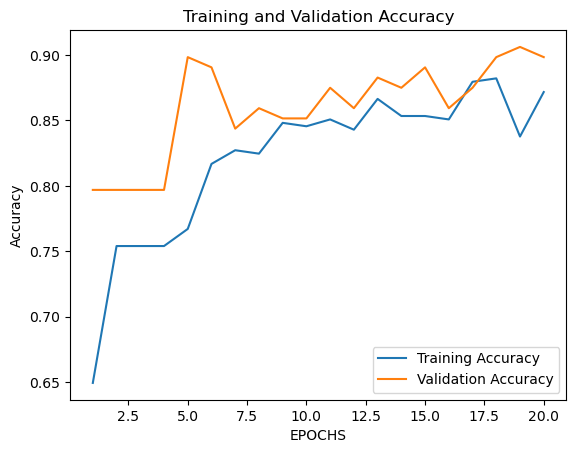

In [90]:
# plotting the graph for accuracy and vel_accuracy
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

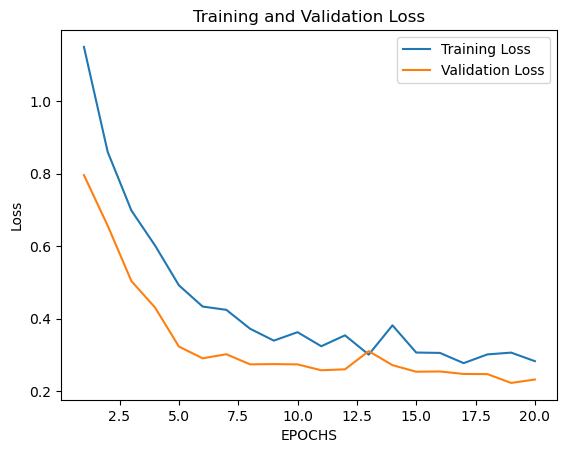

In [91]:
# plotting the graph for accuracy and vel_accuracy
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 3s 637ms/step


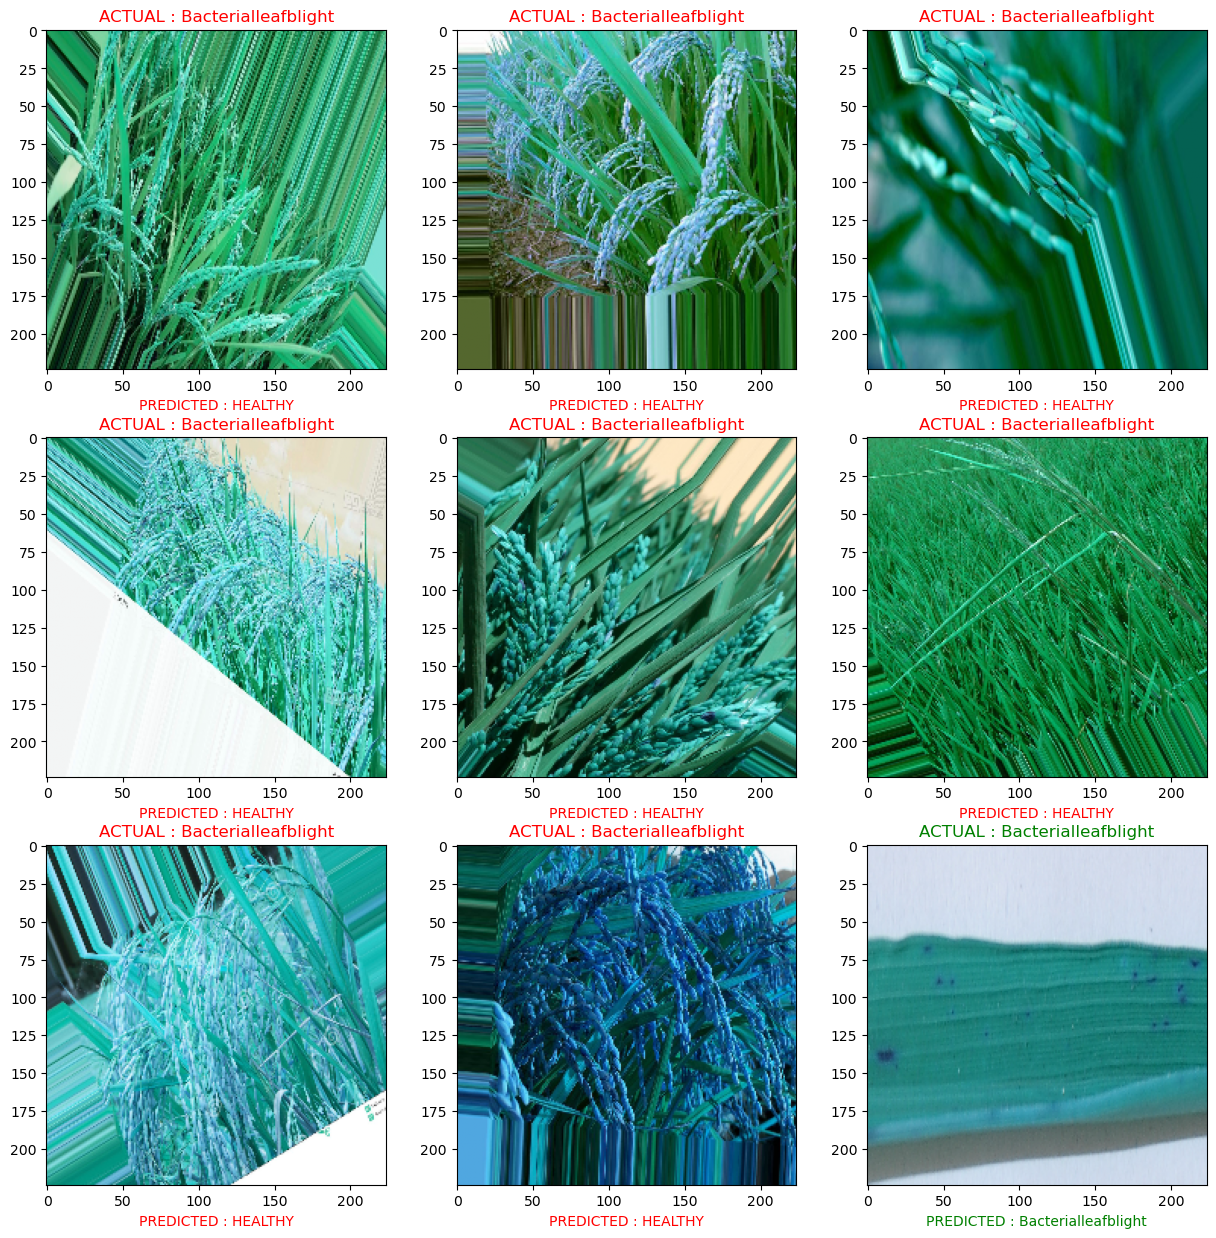

In [92]:
# categories = np.sort(os.listdir(DIRECTORY))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        if(classes[np.argmax(y_test[k])] == classes[np.argmax(cnn.predict(X_test)[k])]):
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(cnn.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(cnn.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

### Save The Best Model

In [93]:
#from keras.models import save, load_model

cnn.save('CnnModel.h5')

In [94]:
from keras.models import load_model

model = load_model('CnnModel.h5')

model.evaluate(X_test, y_test)

4/4 [==============================] - 3s 639ms/step - loss: 0.2319 - accuracy: 0.8984


[0.23187255859375, 0.8984375]